# Image Enhancement

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

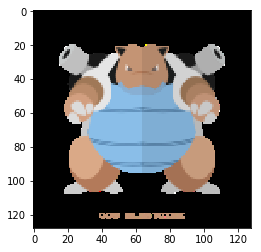

In [2]:
image = cv2.imread('blastoise.png')
# print(image
plt.imshow(image,cmap = 'gray')

### Image Inverse

In [3]:
image_inverse = image.copy()

In [4]:
image_inverse = ~image_inverse

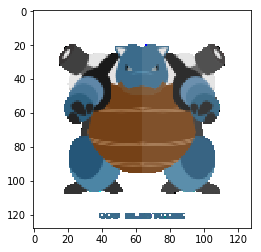

In [5]:
plt.imshow(image_inverse,cmap='gray')

### Intensity Level Slicing

In [6]:
image_ils = image.copy()
print(np.unique(image_ils))

[  0  18  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38
  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56
  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164
 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182
 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200
 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218
 219 220 221 222 223 224 225 226 227 228 229 230 231 232 236 239 244 255]


In [7]:
a,b = 0,40

In [8]:
def ils(image):
    image_new = image.ravel()
    image_new = np.where((image_new >= a) & (image_new < b) , 130, image_new)
    return image_new.reshape(image.shape)

In [9]:
image_ils = ils(image_ils)

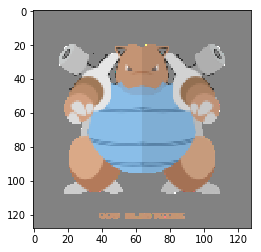

In [10]:
plt.imshow(image_ils,cmap='gray')

### Bit Plane Slicing

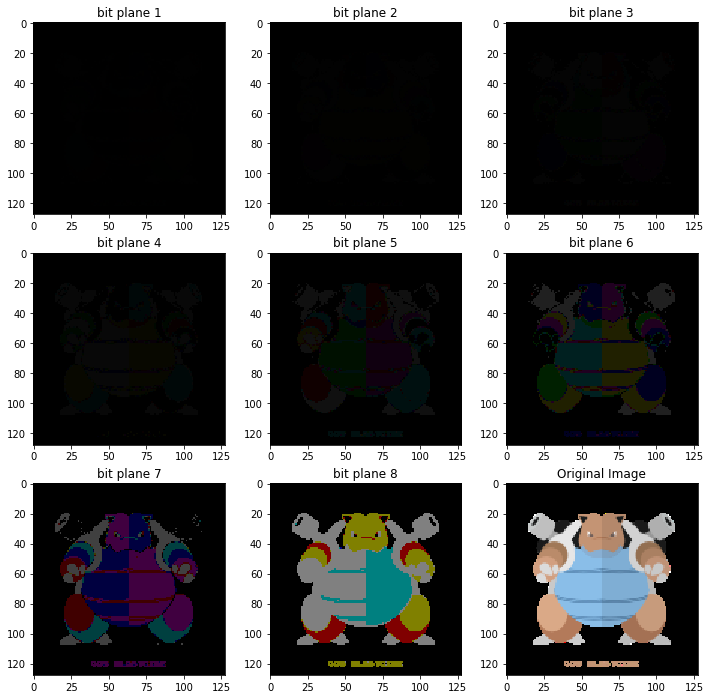

In [11]:
def bit_plane_slicing(image):
    _, ax = plt.subplots(nrows = 3, ncols= 3, figsize=(12,12))
    k = 0
    for i in range(3):
        for j in range(3):
            if k < 8:
                bit_plane = image.copy() & 2**(k)
                k += 1
                ax[i,j].set_title("bit plane " + str(k))
                ax[i,j].imshow(bit_plane)
    ax[i,j].set_title("Original Image")
    ax[i,j].imshow(image.copy())
    plt.show()
    return

bit_plane_slicing(image)

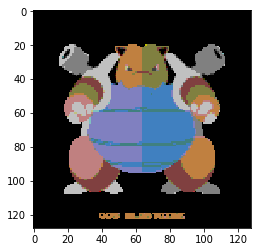

In [12]:
image_67 = image.copy() & (2**(6) + 2**7)
plt.imshow(image_67,cmap='gray')
plt.show()

### Contrast Stretching

In [13]:
def change_contrast(image, r1, r2, s1, s2):
    a,b = r1,r2
    
    if a == 0:
        print('not possible')
        return image
    else:
        l = s1//r1
    v = s1
    
    if b == a:
        print('not possible')
        return image
    else:
        m = (s1-s2)//(a-b)
    g = abs(s2 - s1)
    
    if b == 255:
        print('not possible')
        return image
    else:
        n = (255 - s2)//(255 - b)
    
    new_image = np.empty_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i,j] in range(0,a):
                new_image[i,j] = l * image[i,j]
            elif image[i,j] in range(a,b):
                new_image[i,j] = m * (image[i,j] - a) + v
            else:
                new_image[i,j] = m * (image[i,j] - a) + v + g
    return new_image

In [14]:
img = cv2.imread('blastoise.png', cv2.IMREAD_GRAYSCALE)
np.unique(img.ravel())

array([  0,  18,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,
        34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,
        47,  48,  49,  50,  51,  52,  53,  55,  56,  58,  59,  60,  61,
        62,  63,  64,  65,  66,  69,  70,  71,  72,  73,  74,  75,  78,
        79,  81,  83,  84,  85,  86,  87,  89,  90,  91,  92,  93,  94,
        95,  96,  97,  98, 100, 101, 102, 103, 104, 105, 106, 107, 108,
       109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121,
       122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134,
       135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147,
       148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160,
       161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173,
       174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186,
       187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199,
       200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 21

(128, 128)
not possible
not possible


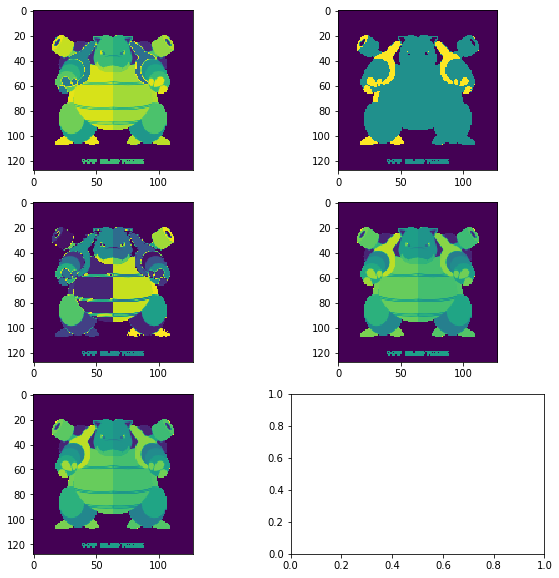

In [15]:
_,ax = plt.subplots(nrows = 3,ncols = 2,figsize=(10,10))
# identity
r1,r2,s1,s2 = 88,210,88,210
image_1 = change_contrast(img.copy(),r1,r2,s1,s2)
print(image_1.shape)
ax[0,0].imshow(image_1)
# shrink
r1,r2,s1,s2 = 100,200,50,100
image_2 = change_contrast(img.copy(),r1,r2,s1,s2)
ax[0,1].imshow(image_2)
# stretch
r1,r2,s1,s2 = 50,70,40,100
image_3 = change_contrast(img.copy(),r1,r2,s1,s2)
ax[1,0].imshow(image_3)
# two Level
r1,r2,s1,s2 = 100,100,0,255
image_4 = change_contrast(img.copy(),r1,r2,s1,s2)
ax[1,1].imshow(image_4)
# threshold
r1,r2,s1,s2 = min(np.unique(img.ravel())),max(np.unique(img.ravel())),0,255
image_5 = change_contrast(img.copy(),r1,r2,s1,s2)
ax[2,0].imshow(image_5)

plt.show()

## Image Spatial Filters

### - Low Pass Filter

In [16]:
def lowpassfilter(image, filter_shape = (3,3)):
    mask = (1/9) * np.ones(shape=filter_shape)
    # (N + 2*P - F) + 1 = N
    p = (filter_shape[0] - 1) // 2
    print("p is :" + str(p))
    new_image = np.zeros(shape = (image.shape[0] + 2*p,image.shape[1] + 2*p))
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            new_image[i + p, j + p] = image[i,j]
    for j in range(p,p+image.shape[0]):
        for i in range(p-1,-1,-1):
            new_image[i,j] = new_image[i+1,j]
        for i in range(p + image.shape[0],new_image.shape[1]):
            new_image[i,j] = new_image[i-1,j]
    for i in range(new_image.shape[0]):
        for j in range(p-1,-1,-1):
            new_image[i,j] = new_image[i,j+1]
        for j in range(p + image.shape[0],new_image.shape[1]):
            new_image[i,j] = new_image[i,j-1]
    print("new image :")
    print(new_image)
    print(new_image.shape)
    
    k,l = 0,0
    final_image = np.zeros(shape= image.shape)
    for row in range(p, new_image.shape[0] - p):
        for col in range(p, new_image.shape[1] - p):
            Ro = 0
            for i in range(filter_shape[0]):
                for j in range(filter_shape[1]):
                    Ro = Ro + new_image[row + i - p, col + j - p] * mask[i,j]
            final_image[k,l] = Ro
            l+=1
        k+=1
        l=0
    return final_image

In [17]:
image = np.ones(shape=(8,8))
for i in range(8):
    for j in range(8):
        if i<=3 :
            image[i,j] = 10
        else:
            image[i,j] = 100
image

array([[ 10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.],
       [ 10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.],
       [ 10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.],
       [ 10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.],
       [100., 100., 100., 100., 100., 100., 100., 100.],
       [100., 100., 100., 100., 100., 100., 100., 100.],
       [100., 100., 100., 100., 100., 100., 100., 100.],
       [100., 100., 100., 100., 100., 100., 100., 100.]])

In [18]:
n = int(input('enter the square filter size : '))

enter the square filter size : 3


In [19]:
image2 = cv2.resize(cv2.imread('IA1.jpg',cv2.IMREAD_GRAYSCALE),(500,500))
final_image = lowpassfilter(image.copy(),filter_shape = (n,n))
cv2.imshow('original image', image)
cv2.imshow('lpf image', final_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

p is :1
new image :
[[ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]
 [100. 100. 100. 100. 100. 100. 100. 100. 100. 100.]
 [100. 100. 100. 100. 100. 100. 100. 100. 100. 100.]
 [100. 100. 100. 100. 100. 100. 100. 100. 100. 100.]
 [100. 100. 100. 100. 100. 100. 100. 100. 100. 100.]
 [100. 100. 100. 100. 100. 100. 100. 100. 100. 100.]]
(10, 10)


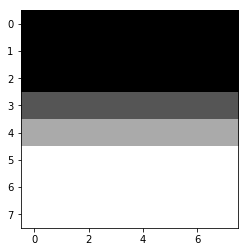

In [20]:
plt.imshow(final_image,cmap='gray')
plt.show()

### - High Pass Filter

In [21]:
def highpassfilter(image, filter_shape = (3,3)):
    mask = (1/9) * np.ones(shape=filter_shape)
    for i in range(filter_shape[0]):
        for j in range(filter_shape[1]):
            if i == filter_shape[0] // 2 and j == filter_shape[1]//2 :
                mask[i,j] = 8*mask[i,j]
            else:
                mask[i,j] = -mask[i,j]
    # (N + 2*P - F) + 1 = N
    p = (filter_shape[0] - 1) // 2
    print("p is :" + str(p))
    new_image = np.zeros(shape = (image.shape[0] + 2*p,image.shape[1] + 2*p))
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            new_image[i + p, j + p] = image[i,j]
    for j in range(p,p+image.shape[0]):
        for i in range(p-1,-1,-1):
            new_image[i,j] = new_image[i+1,j]
        for i in range(p + image.shape[0],new_image.shape[1]):
            new_image[i,j] = new_image[i-1,j]
    for i in range(new_image.shape[0]):
        for j in range(p-1,-1,-1):
            new_image[i,j] = new_image[i,j+1]
        for j in range(p + image.shape[0],new_image.shape[1]):
            new_image[i,j] = new_image[i,j-1]
    print("new image :")
    print(new_image)
    print(new_image.shape)
    
    k,l = 0,0
    final_image = np.zeros(shape= image.shape)
    for row in range(p, new_image.shape[0] - p):
        for col in range(p, new_image.shape[1] - p):
            Ro = 0
            for i in range(filter_shape[0]):
                for j in range(filter_shape[1]):
                    Ro = Ro + new_image[row + i - p, col + j - p] * mask[i,j]
            final_image[k,l] = Ro
            l+=1
        k+=1
        l=0
    return final_image

In [22]:
n = int(input('enter the square filter size : '))

enter the square filter size : 7


In [23]:
image2 = cv2.resize(cv2.imread('IA1.jpg',cv2.IMREAD_GRAYSCALE),(500,500))
final_image = highpassfilter(image,filter_shape = (n,n))
cv2.imshow('original image', image)
cv2.imshow('hpf image', final_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

p is :3
new image :
[[ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]
 [100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.]
 [100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.]
 [100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.]
 [100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.]
 [100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.]
 [100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.]
 [100. 100. 100. 100. 100. 100.

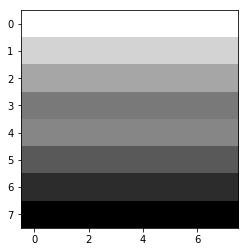

In [24]:
plt.imshow(final_image, cmap = 'gray')
plt.show()

### - High Boost Filter

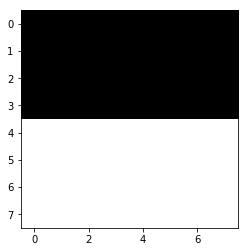

In [25]:
image = np.ones(shape=(8,8))
for i in range(8):
    for j in range(8):
        if i<=3 :
            image[i,j] = 10
        else:
            image[i,j] = 100
plt.imshow(image, cmap='gray')
plt.show()

In [26]:
def calculate_c(back_color, filter_shape = 3):
    c = 0
    x = ((back_color * 9) - (-(filter_shape ** 2 - 1) * back_color)) / back_color
    return x/8

In [27]:
def highboostfilter(image, filter_shape = (3,3)):
    mask = (1/9) * np.ones(shape=filter_shape)
    c = calculate_c(image[0,0], filter_shape[0])
    print('c is : ' + str(c))
    for i in range(filter_shape[0]):
        for j in range(filter_shape[1]):
            if i == filter_shape[0] // 2 and j == filter_shape[1]//2 :
                mask[i,j] = 8*mask[i,j]*c
            else:
                mask[i,j] = -mask[i,j]
    # (N + 2*P - F) + 1 = N
    p = (filter_shape[0] - 1) // 2
    print("p is :" + str(p))
    new_image = np.zeros(shape = (image.shape[0] + 2*p,image.shape[1] + 2*p))
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            new_image[i + p, j + p] = image[i,j]
    for j in range(p,p+image.shape[0]):
        for i in range(p-1,-1,-1):
            new_image[i,j] = new_image[i+1,j]
        for i in range(p + image.shape[0],new_image.shape[1]):
            new_image[i,j] = new_image[i-1,j]
    for i in range(new_image.shape[0]):
        for j in range(p-1,-1,-1):
            new_image[i,j] = new_image[i,j+1]
        for j in range(p + image.shape[0],new_image.shape[1]):
            new_image[i,j] = new_image[i,j-1]
    
    k,l = 0,0
    final_image = np.zeros(shape= image.shape)
    for row in range(p, new_image.shape[0] - p):
        for col in range(p, new_image.shape[1] - p):
            Ro = 0
            for i in range(filter_shape[0]):
                for j in range(filter_shape[1]):
                    Ro = Ro + new_image[row + i - p, col + j - p] * mask[i,j]
            final_image[k,l] = Ro
            l+=1
        k+=1
        l=0
    return final_image

In [28]:
n = int(input('enter the square filter size : '))

enter the square filter size : 3


In [29]:
final_image = highboostfilter(image,filter_shape = (n,n))
cv2.imshow('original image', image)
cv2.imshow('hpf image', final_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

c is : 2.125
p is :1


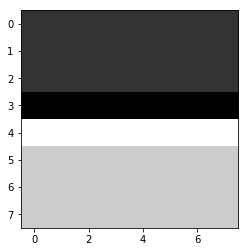

In [30]:
plt.imshow(final_image,cmap = 'gray')
plt.show()

In [31]:
print(final_image)

[[ 10.  10.  10.  10.  10.  10.  10.  10.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.]
 [-20. -20. -20. -20. -20. -20. -20. -20.]
 [130. 130. 130. 130. 130. 130. 130. 130.]
 [100. 100. 100. 100. 100. 100. 100. 100.]
 [100. 100. 100. 100. 100. 100. 100. 100.]
 [100. 100. 100. 100. 100. 100. 100. 100.]]
